<a href="https://colab.research.google.com/github/maxstclair/DS4002/blob/main/Image_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Image Data

In [ ]:
import os
import zipfile

from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Choose, upload, and unzip the zip folder with the images

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.zip to images.zip


In [ ]:
zip_path = "images.zip" # zip folder with images
extract_path = "unzipped_folder"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


['__MACOSX', 'images']

In [ ]:
image_dir = 'unzipped_folder'
image_files = glob(os.path.join(image_dir, '**', '*.jpg'), recursive=True)
print(f"Total images found: {len(image_files)}")

Total images found: 7390


## Example images grid

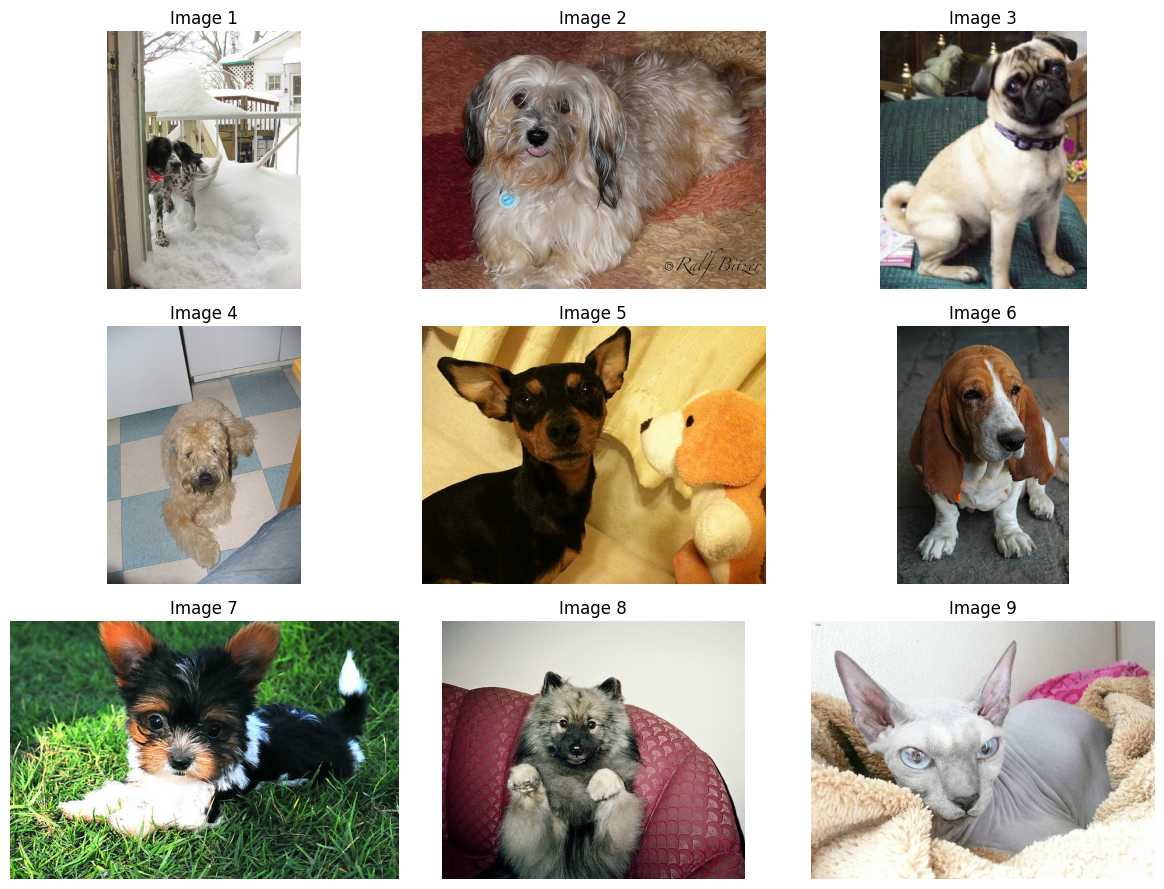

In [ ]:
def plot_image_grid(img_paths, rows=3, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 9))
    for i, ax in enumerate(axes.flat):
        img = Image.open(img_paths[i])
        ax.imshow(img)
        ax.set_title(f"Image {i+1}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_image_grid(image_files)

## Image Dimensions Plot

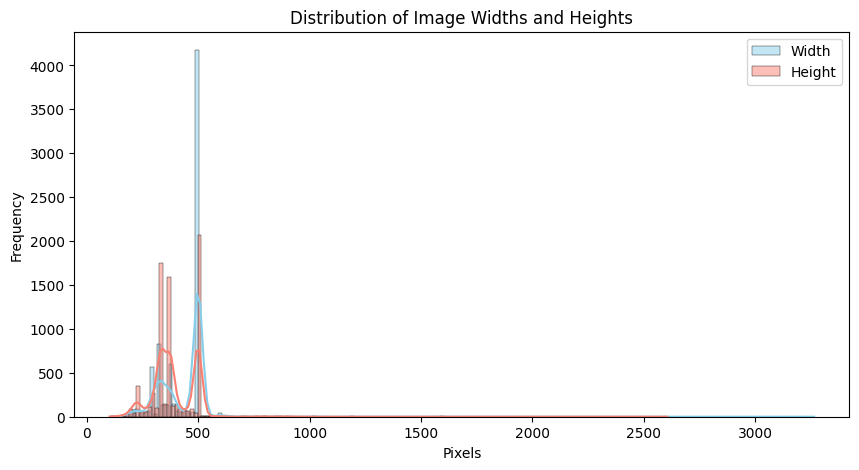

In [ ]:
sizes = [Image.open(f).size for f in image_files]
widths, heights = zip(*sizes)

plt.figure(figsize=(10, 5))
sns.histplot(widths, color='skyblue', label='Width', kde=True)
sns.histplot(heights, color='salmon', label='Height', kde=True)
plt.legend()
plt.title("Distribution of Image Widths and Heights")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()

## Aspect Ratio Distribution

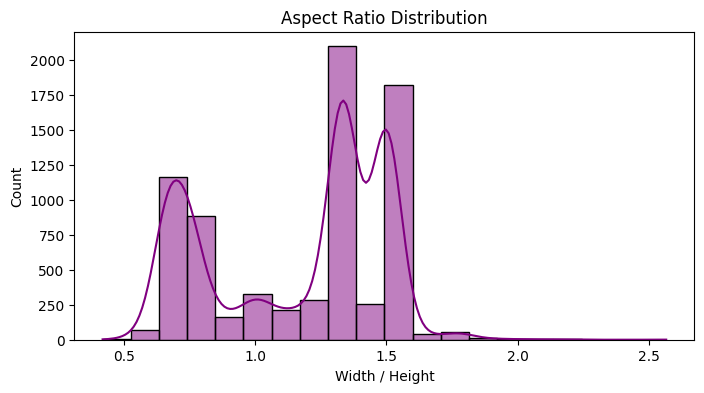

In [ ]:
aspect_ratios = [w / h for w, h in sizes]

plt.figure(figsize=(8, 4))
sns.histplot(aspect_ratios, bins=20, kde=True, color='purple')
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.ylabel("Count")
plt.show()